<a href="https://colab.research.google.com/github/DakshLee/SOC-25/blob/main/SOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1968892307.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


📌 Linear Regression
Mean Squared Error: 6.214979848283058
R² Score: 0.9837673533432493

📌 Random Forest
Mean Squared Error: 67.70514329444508
R² Score: 0.823163760016531



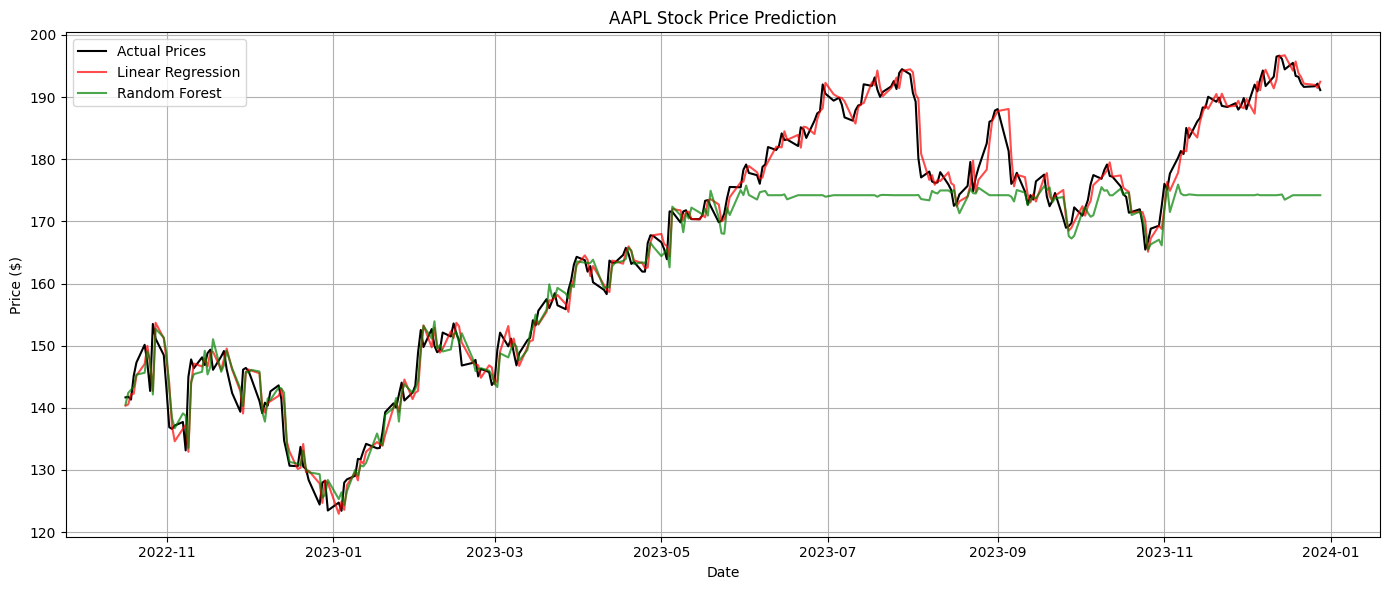

In [ ]:
# 📦 Step 1: Install necessary libraries
!pip install yfinance scikit-learn matplotlib pandas numpy --quiet

# 📥 Step 2: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📈 Step 3: Download Historical Stock Data
ticker = 'AAPL'  # Change this to any stock ticker you like (e.g., 'TSLA', 'INFY.NS')
start_date = '2018-01-01'
end_date = '2023-12-31'

df = yf.download(ticker, start=start_date, end=end_date)
df.reset_index(inplace=True)

# 🧹 Step 4: Preprocess the Data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Target'] = df['Close'].shift(-1)  # Predict next day's Close price
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target']

# 📊 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 🤖 Step 6: Train Models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 📏 Step 7: Evaluate the Models
def evaluate_model(name, actual, predicted):
    print(f"📌 {name}")
    print("Mean Squared Error:", mean_squared_error(actual, predicted))
    print("R² Score:", r2_score(actual, predicted))
    print()

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# 📉 Step 8: Visualize Predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='black')
plt.plot(y_test.index, lr_preds, label='Linear Regression', color='red', alpha=0.7)
plt.plot(y_test.index, rf_preds, label='Random Forest', color='green', alpha=0.7)
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
